# Data Science Topics Survey

In [1]:
# Import Primary Modules
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# Importing the dataset
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col = 0)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
# View top 5 rows of the data 
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
# Load in the necessary libraries for plotting.
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [5]:
# Sort the dataframe in descending order of Very interested.
df.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

# Convert the numbers into percentages of the total number of respondents. 
# Recall that 2,233 respondents completed the survey. 
# Round percentages to 2 decimal places.
df = round((df/2233)*100,2)

# View top 5 rows of the data 
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


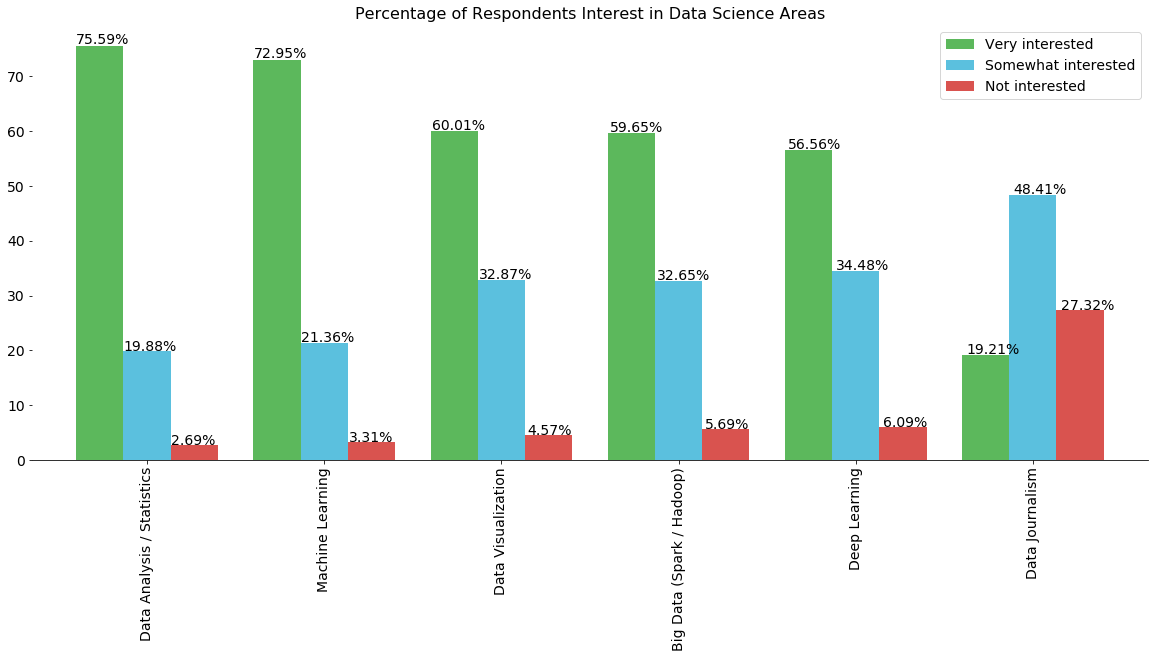

In [6]:
# As for the chart:
# - use a figure size of (20, 8),
# - bar width of 0.8,
# - use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
# - use font size 14 for the bar labels, percentages, and legend,
# - use font size 16 for the title, and,
# - display the percentages above the bars as shown above, and remove the left, top, and right borders.

import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

# Plotting
ax = df.plot(kind='bar', figsize=(20,8), width=0.8, color=['#5cb85c','#5bc0de','#d9534f'], fontsize = 14, rot=90)
ax.set_title('Percentage of Respondents Interest in Data Science Areas', fontsize=16)
ax.set_facecolor('white')
ax.legend(fontsize=14,facecolor='white') 

# Remove the left, top, and right borders.
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Creating a function to display the percentage.
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)
plt.show()

# San Fransisco Map

In [7]:
# Importing the dataset
df_sfc = pd.read_csv('https://ibm.box.com/shared/static/nmcltjmocdi8sd5tk93uembzdec8zyaq.csv')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [8]:
# View top 5 rows of the data 
df_sfc.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [9]:
# Assigning a variable with the total counts of each Neighborhood
df_neig= df_sfc['PdDistrict'].value_counts()

# Assigning the values of the variable to a Pandas Data frame
df_neig1 = pd.DataFrame(data=df_neig.values, index = df_neig.index, columns=['Count'])

# Reindexing the data frame to the requirement
df_neig1 = df_neig1.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

# Resetting the index
df_neig1 = df_neig1.reset_index()

# Assignming the column names
df_neig1.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

# View the data frame
df_neig1

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [10]:
# Load the packages for creating the Choropleth map
!pip install folium
import folium

In [11]:
# Read in the GeoJSON file
geojson = r'https://cocl.us/sanfran_geojson'

In [12]:
# For the map, make sure that:
# - it is centred around San Francisco,
# - you use a zoom level of 12,
# - you use fill_color = 'YlOrRd',
# - you define fill_opacity = 0.7,
# - you define line_opacity=0.2, and,
# - you define a legend and use the default threshold scale.

# Create the map centering San Fransico
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

# Display the map
sf_map.choropleth(geo_data=geojson,
                  data=df_neig1,
                  columns=['Neighborhood', 'Count'],
                  key_on='feature.properties.DISTRICT',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco'
)

sf_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
